In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from neurodsp import sim
from neurodsp.spectral import compute_spectrum
from galaxybrain.data_utils import load_mouse_data, return_pops, spike_dict
from galaxybrain.plot_utils import rc_style, noticks, pltlabel
from galaxybrain import ramsey

rc_style()

mice_regions = spike_dict([0]) #just grabbing first mouse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis pipeline schematics

Diagrams/schematics(to illustrate methods) for papers and presentations

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


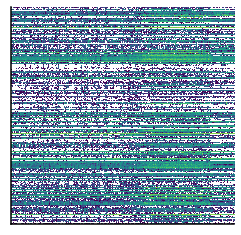

In [19]:
burn_in = 400
krebs_sample = np.log10(np.array(mice_regions['krebs'][0][0]))[burn_in:-burn_in,350:].T
plt.imshow(krebs_sample, aspect='auto')
noticks()

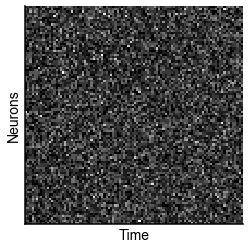

In [66]:
fake_raster = np.random.poisson(lam=2.0, size=(100,100))
plt.imshow(fake_raster, cmap='gray')
pltlabel(None, 'Time', 'Neurons')
noticks()

# plt.savefig('../fig/diagram/raster_fake.png', bbox_inches='tight', pad_inches=0.0, dpi=400)

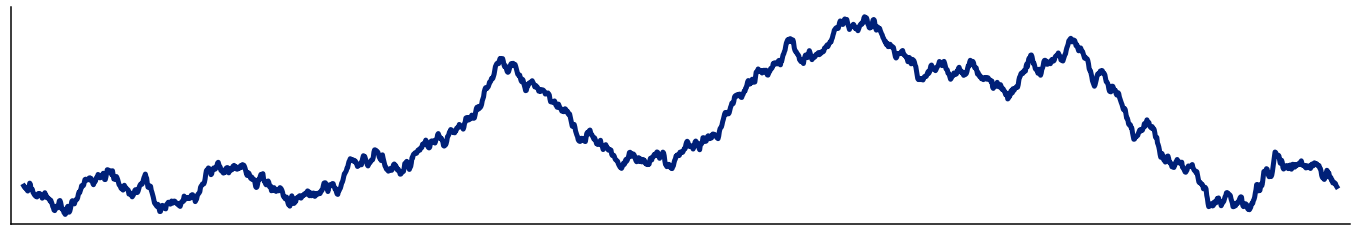

In [56]:
dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=500, exponent=-2.25)
plt.figure(figsize=(24,4))
plt.plot(dummy_pop_vec, lw=5, color='#002078')
noticks()
plt.margins(x=0.01)
# plt.savefig('../fig/diagram/sum.png', bbox_inches='tight', pad_inches=0.0, dpi=400)

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


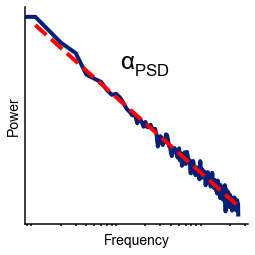

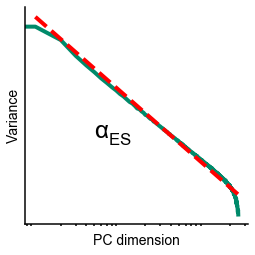

In [61]:
def dummy_spectrum(exp, dim, clr, xylab, anno_xy):
    """Plot simulated spectrum and aperiodic fit"""
    FS = 500
    model = lambda x, offset: (10**offset)*x**-exp # to plot power law
    dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=FS, exponent=exp)
    ## plot spectrum
    freqs, psd = compute_spectrum(dummy_pop_vec, FS, nperseg=FS, noverlap=FS/2)
    plt.loglog(psd.T, lw=4, color=clr)
    
    ## plot aperiodic fit
    exp, er, of = ramsey.fooofy(freqs, psd, x_range=None, group=False)
    plt.loglog(freqs, model(freqs, of),color='red',lw=4, ls='--')
    
    pltlabel(None, *xylab)
    plt.annotate(r'$\alpha_{%s}$'%dim, anno_xy, fontsize=24)
    noticks()
    # plt.savefig(f'../fig/diagram/{dim}_fit.png', bbox_inches='tight', pad_inches=0., dpi=400)

dummy_spectrum(-3, 'PSD', '#002078', ['Frequency', 'Power'], (10, 10e-4))
plt.figure()
dummy_spectrum(-6, 'ES', '#008a6a', ['PC dimension', 'Variance'], (5, 10e-12))

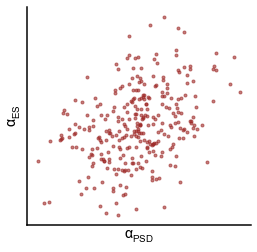

In [62]:
points = np.random.multivariate_normal([0,0], ([5,2.5], [2.5,6]), 300).T
plt.scatter(points[0],points[1], marker='o', color='#9e2a28', alpha=0.6)
noticks()
pltlabel(None, r'$\alpha_{PSD}$', r'$\alpha_{ES}$')
# plt.savefig('../fig/diagram/exp_scatter.png', bbox_inches='tight', pad_inches=0., dpi=400)

# Ising

([], [])

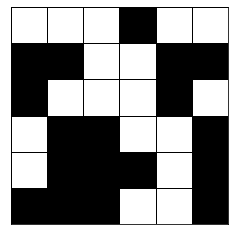

In [9]:
import matplotlib.pyplot as plt
import numpy as np

grid = np.random.randint(0,2, size=(6,6))
# fig = plt.figure()
plt.pcolormesh(grid, edgecolors='k', linewidth=1)
ax = plt.gca()
ax.set_aspect('equal')
# plt.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.gray()
plt.xticks([])
plt.yticks([])

# plt.axis('off')

# Conference figures

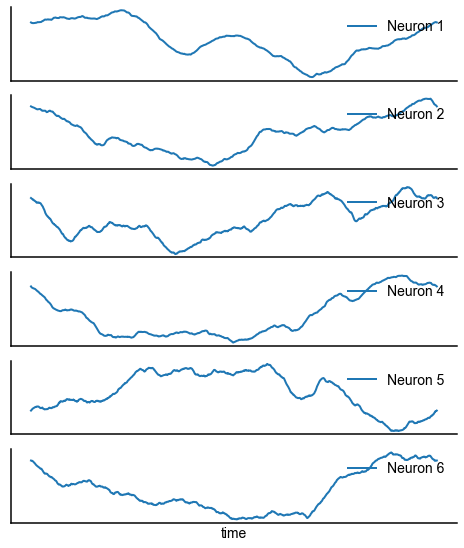

In [36]:
plt.figure(figsize=(8,16))

for i in range(6):
    signal = sim.sim_powerlaw(n_seconds=100, fs=500, exponent=-3)
    plt.subplot(10,1,i+1)
    plt.plot(signal, label = 'Neuron {}'.format(i+1))
    plt.legend(loc = 'upper right')
    noticks()
plt.xlabel('time')
plt.show()

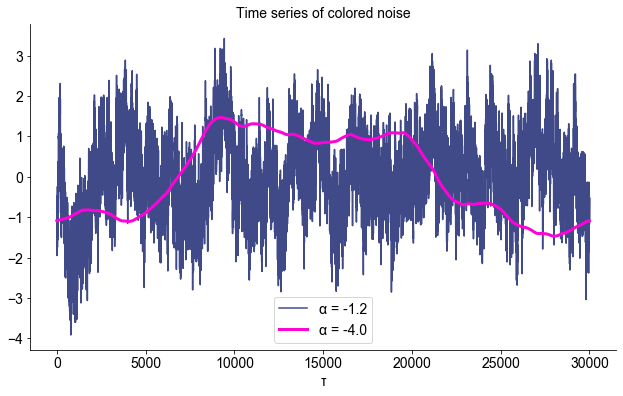

In [195]:
plt.figure(figsize = (10.5,6))
plt.plot(signals['-1.2'][0].T, color = '#111d6c', label = '\u03B1 = -1.2', alpha = 0.8)
plt.plot(signals['-4.0'][0].T, color = '#fc03d7', lw = 3, label = '\u03B1 = -4.0')
plt.legend(fontsize = 14)
plt.xlabel('\u03C4')
plt.title('Time series of colored noise', fontsize = 14)
plt.show()
# plt.savefig('../../conferences/sampleseries', dpi = 300)